In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

In [3]:
data_dir = '/content/drive/MyDrive/result'

img_height,img_width=224,224
batch_size=2
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3919 files belonging to 4 classes.
Using 3136 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3919 files belonging to 4 classes.
Using 783 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4']


In [6]:
mobilenet_model = tf.keras.models.Sequential()

pretrained_model= tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224,224,3), alpha=1.0, include_top=False, weights='imagenet',
    input_tensor=None, pooling='avg', classes=4,
    classifier_activation='softmax')

for layer in pretrained_model.layers:
        layer.trainable=False

mobilenet_model.add(pretrained_model)
mobilenet_model.add(tf.keras.layers.Flatten())
mobilenet_model.add(tf.keras.layers.Dense(512, activation='relu'))
mobilenet_model.add(tf.keras.layers.Dense(4, activation='softmax'))

9420800/9406464 [==============================] - 0s 0us/step


In [7]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 2,915,908
Trainable params: 657,924
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = mobilenet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
1568/1568 [==============================] - 544s 337ms/step - loss: 1.2089 - accuracy: 0.4608 - val_loss: 1.0477 - val_accuracy: 0.5313
Epoch 2/30
1568/1568 [==============================] - 28s 18ms/step - loss: 0.9578 - accuracy: 0.5781 - val_loss: 0.9736 - val_accuracy: 0.5798
Epoch 3/30
1568/1568 [==============================] - 28s 18ms/step - loss: 0.8468 - accuracy: 0.6464 - val_loss: 0.9733 - val_accuracy: 0.5785
Epoch 4/30
1568/1568 [==============================] - 28s 18ms/step - loss: 0.7446 - accuracy: 0.6948 - val_loss: 0.9162 - val_accuracy: 0.6271
Epoch 5/30
1568/1568 [==============================] - 27s 17ms/step - loss: 0.6732 - accuracy: 0.7130 - val_loss: 0.8156 - val_accuracy: 0.6590
Epoch 6/30
1568/1568 [==============================] - 27s 17ms/step - loss: 0.6036 - accuracy: 0.7417 - val_loss: 0.7902 - val_accuracy: 0.6960
Epoch 7/30
1568/1568 [==============================] - 28s 18ms/step - loss: 0.5409 - accuracy: 0.7717 - val_loss: 0.8031

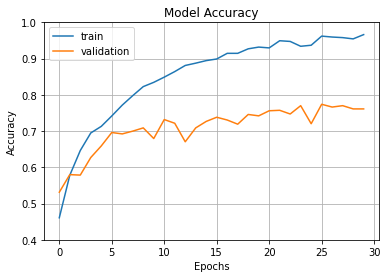

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

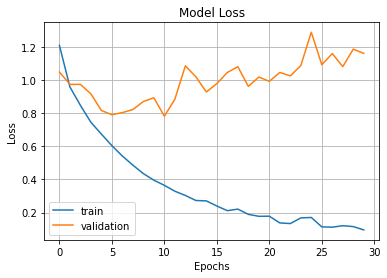

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
pip install tensorflowjs

     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 462 kB 60.6 MB/s 


In [13]:
import tensorflowjs as tfjs

tfjs_target_dir = '/content/drive/MyDrive/tfjs/v2'
tfjs.converters.save_keras_model(mobilenet_model, tfjs_target_dir)